<a href="https://colab.research.google.com/github/mbrandino/challenge2-data-science/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_telecom = pd.read_json('/content/TelecomX_Data.json')

In [ ]:
df_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
customer_normalized = pd.json_normalize(df_telecom['customer'])
phone_normalized = pd.json_normalize(df_telecom['phone'])
internet_normalized = pd.json_normalize(df_telecom['internet'])
account_normalized = pd.json_normalize(df_telecom['account'])

In [6]:
df_final = pd.concat([df_telecom[['customerID', 'Churn']], customer_normalized, phone_normalized, internet_normalized, account_normalized], axis=1)

In [7]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
df_final.to_json('arquivo_normalizado.json', index=False)

In [9]:
df_final.reset_index(drop=True, inplace=True)

In [10]:
df_final.to_csv('arquivo_normalizado.csv', index=False)

In [11]:
df_analise = pd.read_csv('/content/arquivo_normalizado.csv')

In [12]:
df_analise.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
df_analise[['Churn', 'SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']] = df_analise[['Churn','SeniorCitizen' , 'gender','Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].astype('category')
df_analise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7043 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   category
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   object  
 10  OnlineSecurity    7267 non-null   object  
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [14]:
novas_colunas = {
    'tenure': 'Ternure',
    'Charges.Monthly': 'ChargesMonthly',
    'Charges.Total': 'ChargesTotal',
    'gender': 'Gender'
}

df_analise = df_analise.rename(columns=novas_colunas)

display(df_analise.head())

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Ternure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
print("Dados ausentes:")
print(df_analise.isnull().sum())

print("\nDuplicatas:")
print(df_analise.duplicated().sum())


print("\nInconsistências Categoricas:")
categorical_cols = df_analise.select_dtypes(include='category').columns
for col in categorical_cols:
    print(f"\nColuna: {col}")
    print(df_analise[col].value_counts())

object_cols = df_analise.select_dtypes(include='object').columns
print("\nObjetos com Inconsitências :")
for col in object_cols:
    print(f"\nColuna: {col}")
    print(df_analise[col].value_counts())

Dados ausentes:
customerID            0
Churn               224
Gender                0
SeniorCitizen         0
Partner               0
Dependents            0
Ternure               0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
ChargesMonthly        0
ChargesTotal          0
dtype: int64

Duplicatas:
0

Inconsistências Categoricas:

Coluna: Churn
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Coluna: Gender
Gender
Male      3675
Female    3592
Name: count, dtype: int64

Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Coluna: PhoneService
PhoneServic

In [16]:
df_analise['ChargesTotal'] = df_analise['ChargesTotal'].replace(' ', np.nan)
df_analise['ChargesTotal'] = pd.to_numeric(df_analise['ChargesTotal'])
df_analise['ChargesTotal'] = df_analise['ChargesTotal'].fillna(0)

In [17]:
df_analise['Churn'] = df_analise['Churn'].replace('', np.nan)
df_analise['Churn'] = df_analise['Churn'].fillna('No')

In [18]:
df_analise[col] = df_analise.apply(
   lambda row: 'No' if row['InternetService'] == 'No' and row[col] == 'No internet service' else row[col],
        axis=1
    )

df_analise[col] = df_analise.apply(
    lambda row: 'No' if row['PhoneService'] == 'No' and row[col] == 'No phone service' else row[col],
            axis=1
        )


In [19]:
print("\nInconsistências de Objetos após correção:")
object_cols = df_analise.select_dtypes(include='object').columns
for col in object_cols:
    print(f"\nColuna: {col}")
    print(df_analise[col].value_counts())


Inconsistências de Objetos após correção:

Coluna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Coluna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Coluna: Contract
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

Coluna: PaymentMethod
PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


In [20]:
print("\nChurs com Nans:")
print(df_analise['Churn'].value_counts())


Churs com Nans:
Churn
No     5398
Yes    1869
Name: count, dtype: int64


In [21]:
df_analise['Diarias'] = df_analise['ChargesMonthly'] / 30
display(df_analise.head())

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Ternure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [22]:
coluna_nomes = df_analise.columns.tolist()
nomes_novos = ['customerID',
'Rotatividade',
'Sexo',
'Idoso',
'Parceiro',
'Dependentes',
'Termo',
'Serviço Telefônico',
'Várias Linhas',
'Serviço de Internet',
'Segurança Online',
'Backup Online',
'Proteção do Dispositivo',
'Suporte Técnico',
'Streaming de TV',
'Streaming de Filmes',
'Contrato',
'Faturamento Eletrônico',
'Forma de Pagamento',
'Cobrança Mensal',
'Cobrança Total',
'Contas_Diárias']

In [23]:
dic_rename = dict(zip(coluna_nomes, nomes_novos))

df_analise = df_analise.rename(columns=dic_rename)

print("\nNomes Novos:")
print(df_analise.columns.tolist())


Nomes Novos:
['customerID', 'Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo', 'Serviço Telefônico', 'Várias Linhas', 'Serviço de Internet', 'Segurança Online', 'Backup Online', 'Proteção do Dispositivo', 'Suporte Técnico', 'Streaming de TV', 'Streaming de Filmes', 'Contrato', 'Faturamento Eletrônico', 'Forma de Pagamento', 'Cobrança Mensal', 'Cobrança Total', 'Contas_Diárias']


In [24]:
df_analise.columns = df_analise.columns.str.replace(' ', '_')
print(df_analise.columns.tolist())

['customerID', 'Rotatividade', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Termo', 'Serviço_Telefônico', 'Várias_Linhas', 'Serviço_de_Internet', 'Segurança_Online', 'Backup_Online', 'Proteção_do_Dispositivo', 'Suporte_Técnico', 'Streaming_de_TV', 'Streaming_de_Filmes', 'Contrato', 'Faturamento_Eletrônico', 'Forma_de_Pagamento', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']


In [25]:
alteracao_das_colunas_dummyzacao = {
    'Rotatividade': {
        'Yes': 1,
        'No': 0
    },

    'Parceiro': {
        'Yes': 1, 'No': 0
    },

    'Dependentes': {
        'Yes': 1, 'No': 0
    },

    'Serviço_Telefônico': {
        'Yes': 1, 'No': 0
    },

    'Várias_Linhas': {
        'Yes': 1, 'No': 0
    },

    'Serviço_Telefônico': {
        'Yes': 1, 'No': 0
    },

    'Proteção_do_Dispositivo': {
        'Yes': 1, 'No': 0
    },

    'Suporte_Técnico': {
        'Yes': 1, 'No': 0
    },

    'Streaming_de_TV': {
        'Yes': 1, 'No': 0
    },

    'Streaming_de_Filmes': {
        'Yes': 1, 'No': 0
    },

    'Faturamento_Eletrônico': {
        'Yes': 1, 'No': 0
    },



}


df_analise = df_analise.replace(alteracao_das_colunas_dummyzacao)
df_analise.head(10)

/tmp/ipython-input-25-73334314.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analise = df_analise.replace(alteracao_das_colunas_dummyzacao)
/tmp/ipython-input-25-73334314.py:52: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_analise = df_analise.replace(alteracao_das_colunas_dummyzacao)
/tmp/ipython-input-25-73334314.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

,customerID,Rotatividade,Sexo,Idoso,Parceiro,Dependentes,Termo,Serviço_Telefônico,Várias_Linhas,Serviço_de_Internet,...,Proteção_do_Dispositivo,Suporte_Técnico,Streaming_de_TV,Streaming_de_Filmes,Contrato,Faturamento_Eletrônico,Forma_de_Pagamento,Cobrança_Mensal,Cobrança_Total,Contas_Diárias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,0,Female,0,0,1,9,1,0,DSL,...,0,1,1,1,Month-to-month,1,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,0,Female,1,1,0,71,1,0,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,0,Male,0,1,0,63,1,1,Fiber optic,...,0,1,0,0,Two year,1,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,0,Female,1,0,0,7,1,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,0,Female,0,1,1,65,1,1,DSL,...,1,1,1,1,Two year,1,Mailed check,90.45,5957.90,3.015000


#📊 Carga e análise

In [26]:
print("\nAnálise Descritiva para Colunas Numéricas:")
print(df_analise.describe())

print("\nAnálise Descritiva para Colunas Categóricas:")
print(df_analise.select_dtypes(include='category').describe())

print("\nContagem de Valores para Colunas Categóricas Chave:")
for col in ['Rotatividade', 'Sexo', 'Parceiro', 'Dependentes', 'Serviço_Telefônico', 'Contrato', 'Forma_de_Pagamento']:
    print(f"\nColuna: {col}")
    print(df_analise[col].value_counts(normalize=True) * 100)

print("\nMatriz de Correlação:")
print(df_analise.corr(numeric_only=True))

print("\nAnálise Descritiva por Rotatividade:")
print(df_analise.groupby('Rotatividade')[['Termo', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']].mean())


Análise Descritiva para Colunas Numéricas:
             Termo  Cobrança_Mensal  Cobrança_Total  Contas_Diárias
count  7267.000000      7267.000000     7267.000000     7267.000000
mean     32.346498        64.720098     2277.182035        2.157337
std      24.571773        30.129572     2268.648587        1.004319
min       0.000000        18.250000        0.000000        0.608333
25%       9.000000        35.425000      396.200000        1.180833
50%      29.000000        70.300000     1389.200000        2.343333
75%      55.000000        89.875000     3778.525000        2.995833
max      72.000000       118.750000     8684.800000        3.958333

Análise Descritiva para Colunas Categóricas:
        Rotatividade  Sexo  Idoso  Parceiro  Dependentes  Serviço_Telefônico  \
count           7267  7267   7267      7267         7267                7267   
unique             2     2      2         2            2                   2   
top                0  Male      0         0            0  

/tmp/ipython-input-26-3555500660.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_analise.groupby('Rotatividade')[['Termo', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']].mean())


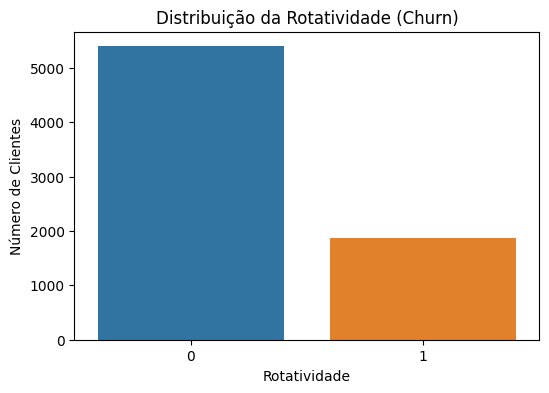


Proporção de Clientes por Rotatividade:
Rotatividade
0    74.280996
1    25.719004
Name: proportion, dtype: float64


In [27]:
rotatividade_counts = df_analise['Rotatividade'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=rotatividade_counts.index, y=rotatividade_counts.values, hue=rotatividade_counts.index, palette='tab10', legend=False)
plt.title('Distribuição da Rotatividade (Churn)')
plt.xlabel('Rotatividade')
plt.ylabel('Número de Clientes')
plt.show()

print("\nProporção de Clientes por Rotatividade:")
print(df_analise['Rotatividade'].value_counts(normalize=True) * 100)

Distribuição de Clientes que Cancelaram por Variáveis Categóricas:


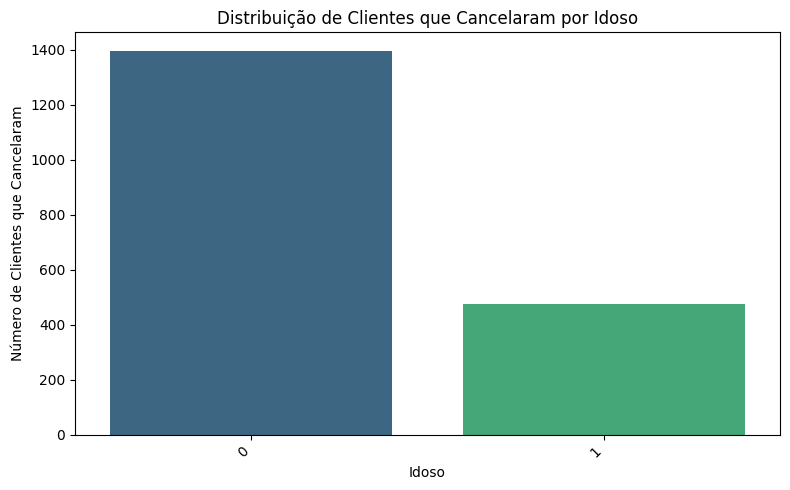

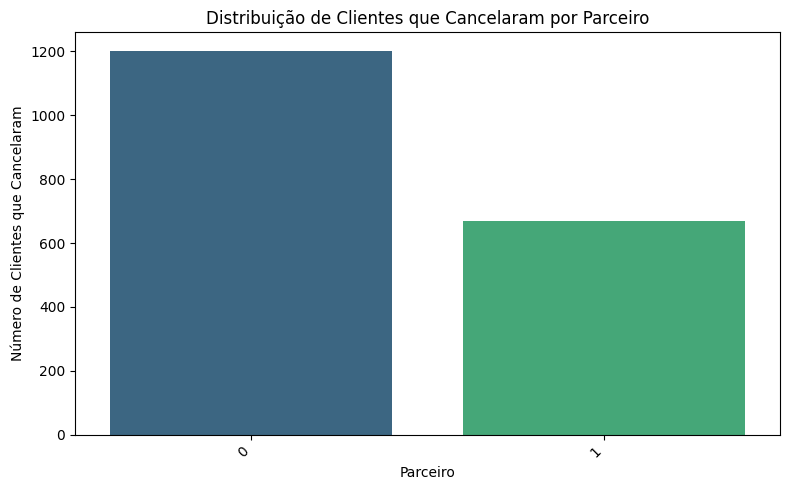

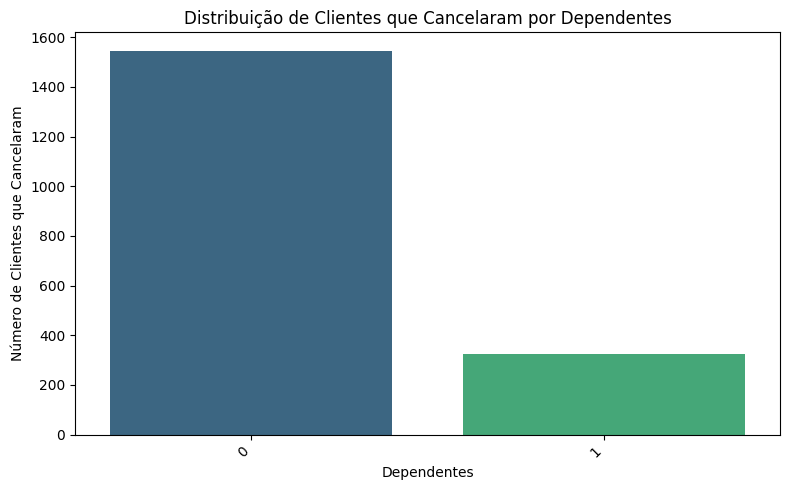

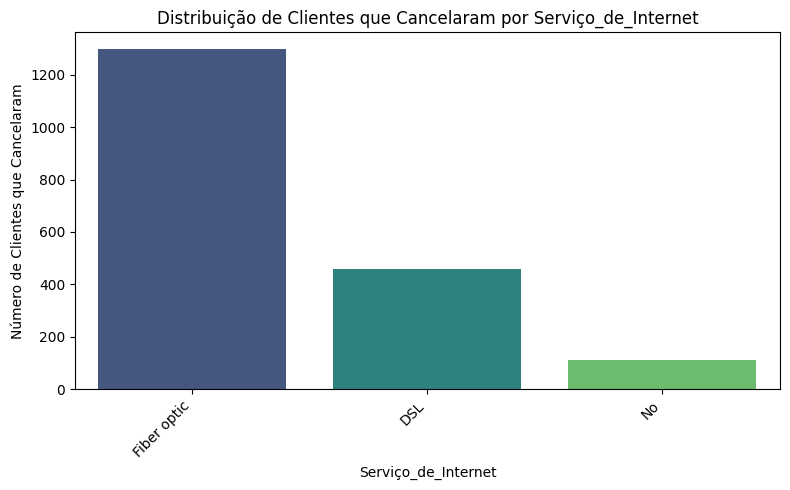

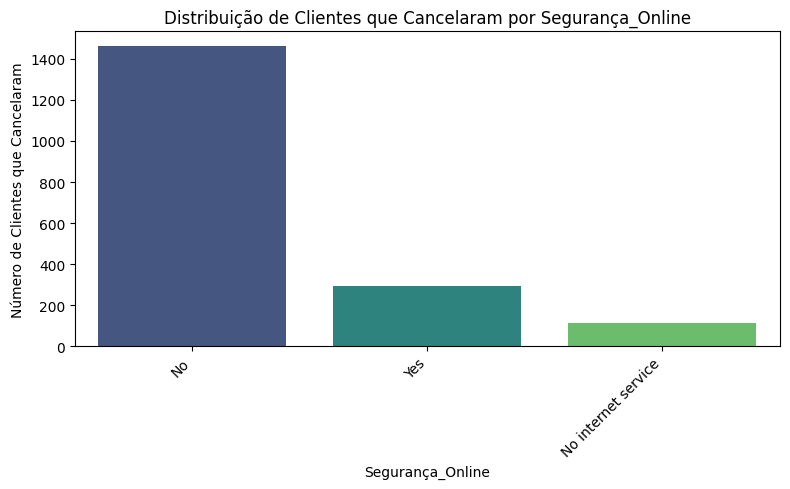

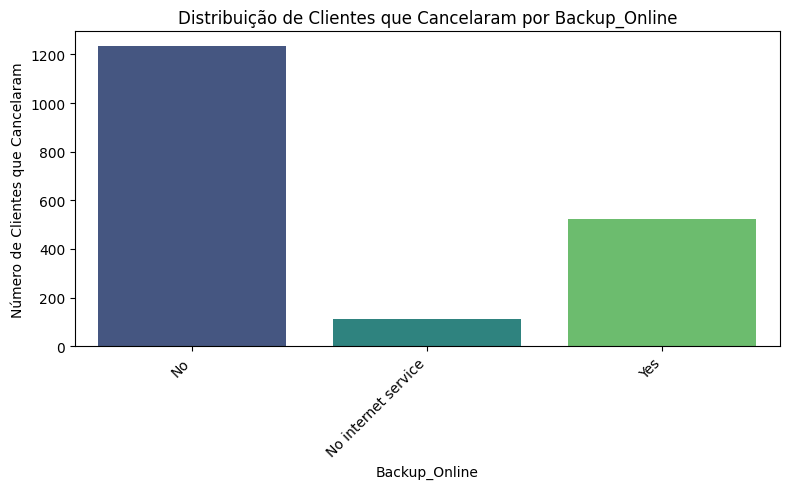

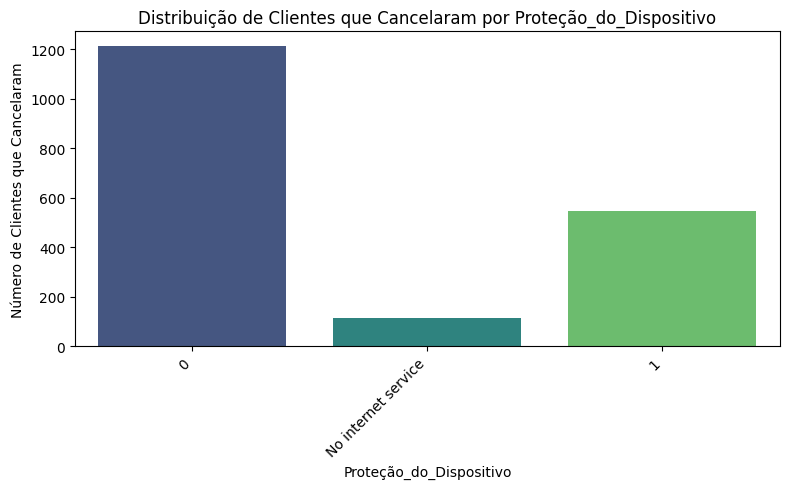

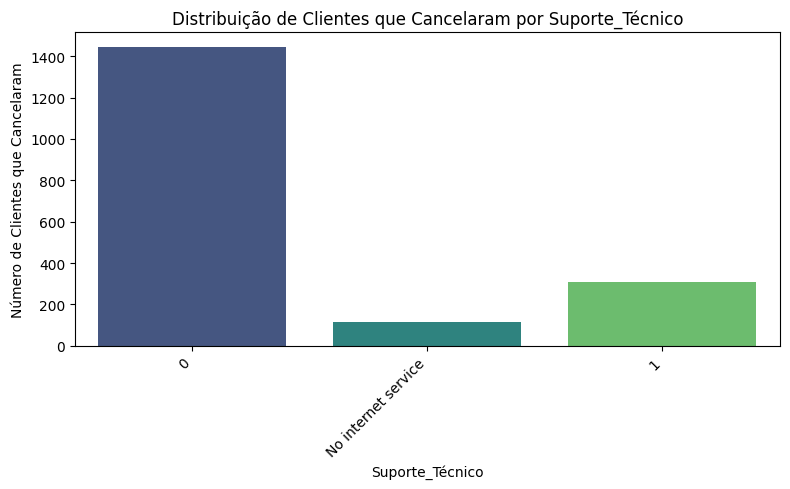

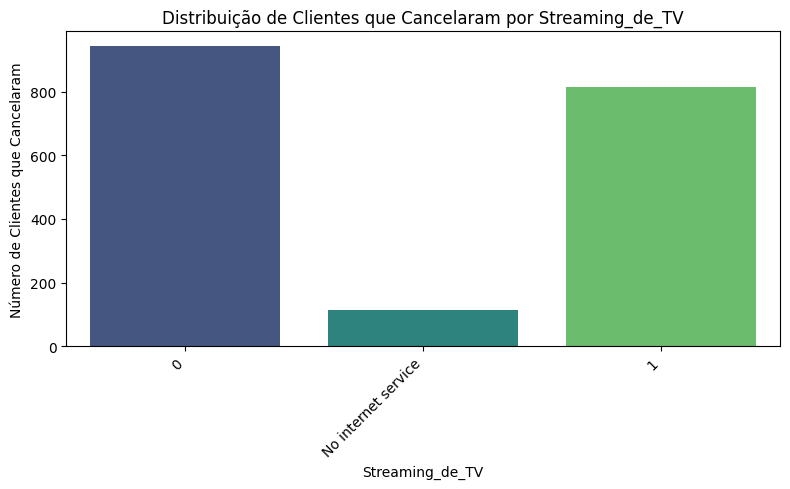

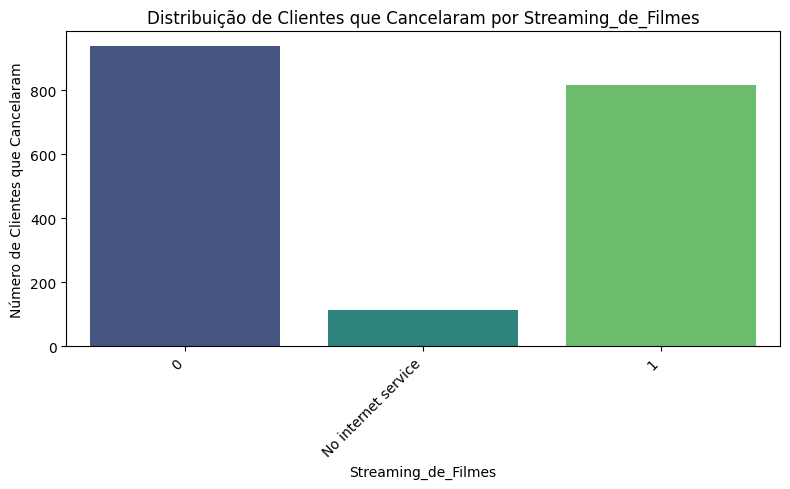

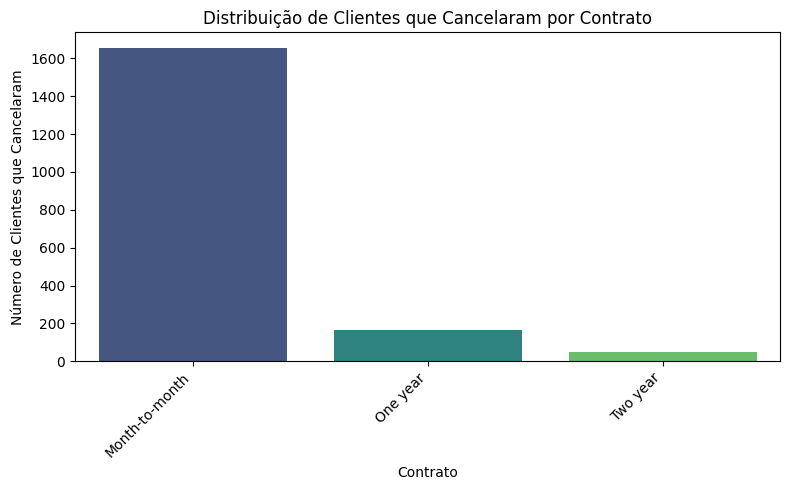

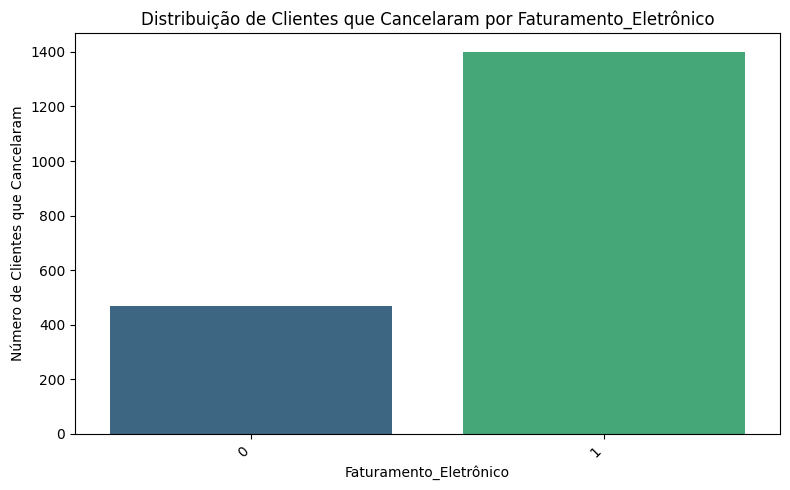

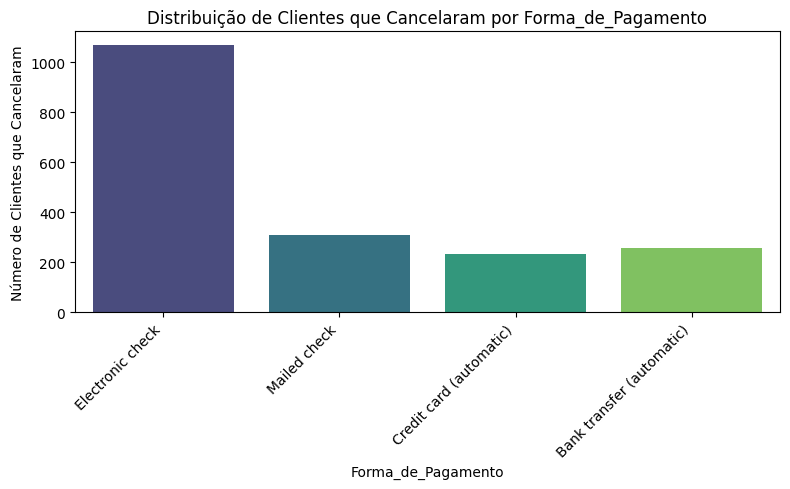

In [28]:
rotatividade_clientes = df_analise[df_analise['Rotatividade'] == 1]

colunas_categoricas = ['Idoso', 'Parceiro', 'Dependentes', 'Serviço_de_Internet','Segurança_Online','Backup_Online','Proteção_do_Dispositivo','Suporte_Técnico','Streaming_de_TV','Streaming_de_Filmes',
                                'Contrato', 'Faturamento_Eletrônico', 'Forma_de_Pagamento']

print("Distribuição de Clientes que Cancelaram por Variáveis Categóricas:")
for col in colunas_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=rotatividade_clientes, x=col, palette='viridis', legend=False, hue=col)
    plt.title(f'Distribuição de Clientes que Cancelaram por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes que Cancelaram')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Análise do Gráfico

Idosos: Os cidadãos mais velhos apresentam uma maior propensão a cancelar seus serviços. Serviço de Internet: Os clientes que utilizam "Fibra óptica" demonstram uma taxa de cancelamento consideravelmente mais alta. Segurança Online, Backup Online, Proteção de Dispositivo, Suporte Técnico, Streaming de TV, Streaming de Filmes: Aqueles que não contratam esses serviços adicionais online tendem a cancelar com mais frequência. Contrato: Clientes com contratos "Mês a mês" apresentam uma taxa de cancelamento significativamente maior. Faturamento Eletrônico: Aqueles que escolhem o faturamento eletrônico têm uma taxa de cancelamento elevada. Forma de Pagamento: Clientes que utilizam "Cheque eletrônico" mostram a maior taxa de cancelamento.



Distribuição de Variáveis Numéricas por Rotatividade:


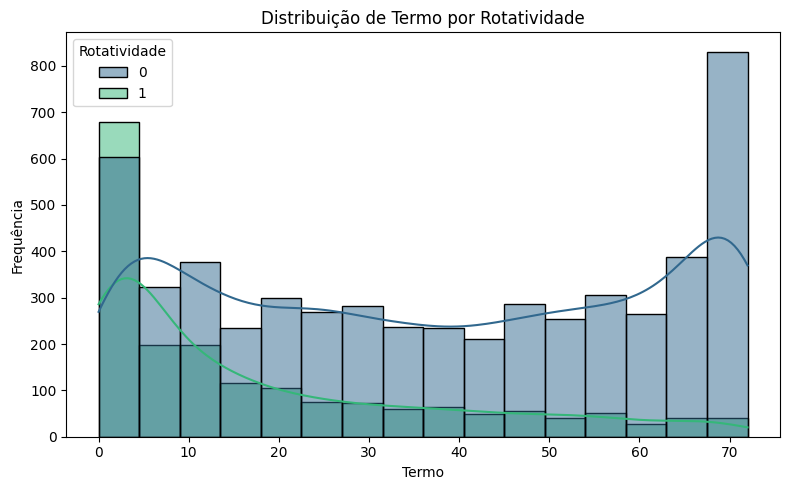

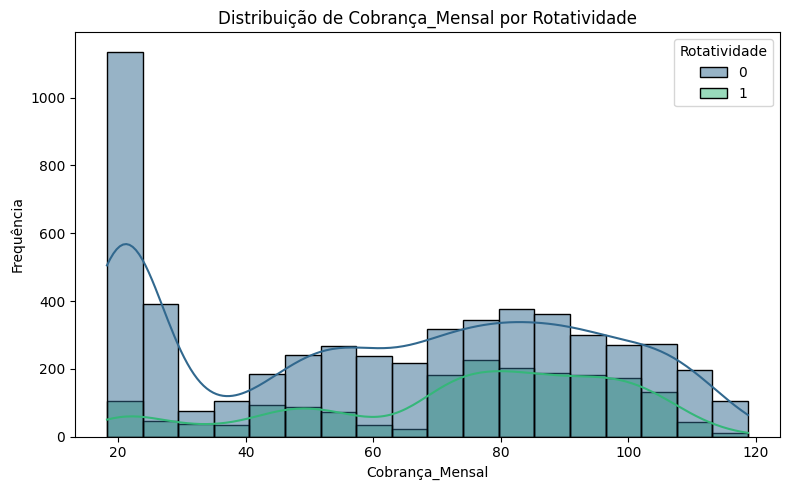

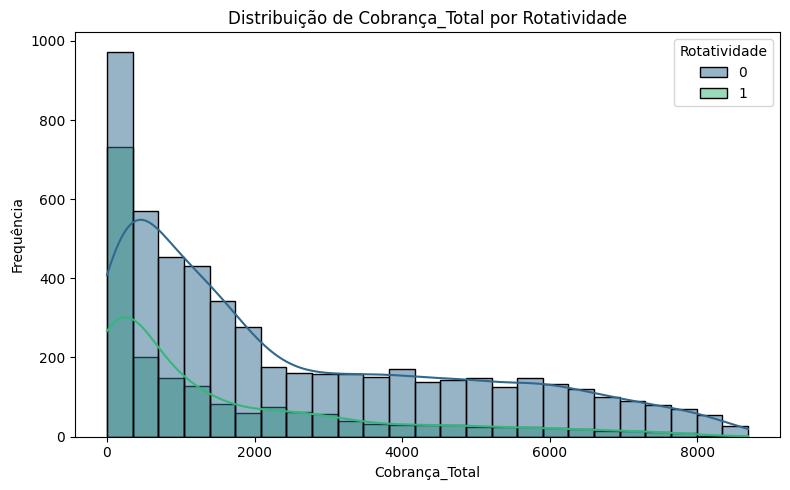

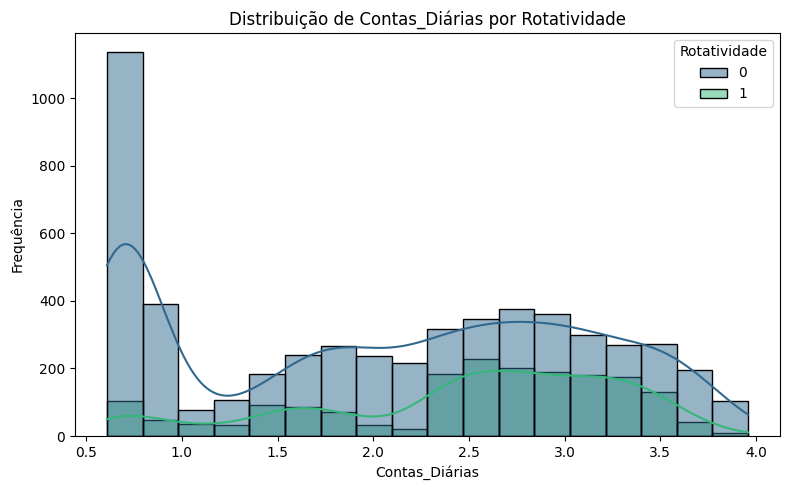

In [29]:
colunas_numericas = ['Termo', 'Cobrança_Mensal', 'Cobrança_Total', 'Contas_Diárias']


print("\nDistribuição de Variáveis Numéricas por Rotatividade:")
for col in colunas_numericas:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=df_analise, x=col, hue='Rotatividade', kde=True, palette='viridis')
    plt.title(f'Distribuição de {col} por Rotatividade')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

***Análise do Gráfico***

Distribuição do Tempo de Permanência em Relação à Rotatividade: Clientes com um período de permanência mais curto (termo reduzido) apresentam uma probabilidade significativamente maior de cancelar o serviço. Distribuição da Cobrança Mensal em Relação à Rotatividade: Clientes que enfrentam cobranças mensais mais elevadas parecem ter uma maior propensão a cancelar. Distribuição da Cobrança Total em Relação à Rotatividade: A relação entre a taxa de cobrança (Cobrança Mensal) e o Tempo de Permanência é um indicador mais direto do comportamento de cancelamento. Distribuição de Contas Diárias em Relação à Rotatividade: Clientes que cancelaram tendem a ter cobranças diárias mais altas.

A empresa tem observado um aumento na taxa de cancelamento dos serviços oferecidos pela Telecom X, mas os gestores ainda não conseguiram determinar a causa desse problema. Portanto, é fundamental descobrir os motivos que levam os clientes a cancelar e sugerir uma solução para prevenir essa situação.

As informações estavam organizadas em uma estrutura aninhada com quatro colunas: customer, phone, internet e account. Foi necessário utilizar o comando pd.json_normalize para desaninhar os dados.

Em seguida, defini as colunas como Categóricas e Numéricas, padronizando a formatação delas. Realizei a tradução dos nomes das colunas para o português e substituí os espaços por "_". Também tratei valores ausentes, espaços em branco e linhas duplicadas. A coluna Churn apresentava 224 valores que não eram 'Yes' nem 'No', por exemplo. Convertemos todos os valores 'Yes' para 1 e 'No' para 0. Na coluna 'gender', os valores 'Male' e 'Female' foram alterados para 'M' e 'F'. A coluna 'InternetService' continha entradas como 'No internet service', que foram corrigidas para 'No'. Por fim, a coluna 'PhoneService' tinha registros com 'No phone service', que também foram ajustados para 'No'.

**Análise Descritiva**

-Distribuição da variável "churn" (evasão) entre os clientes.

Distribuição da Evasão

-Análise de como a evasão se distribui em relação a variáveis categóricas, como gênero, tipo de contrato, entre outras.

Distribuição da Evasão

-Exame de como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre os clientes que cancelaram (evasão) e aqueles que não cancelaram.

Distribuição da Evasão em Variáveis Numéricas

Distribuição da Evasão em Variáveis Numéricas.

#📄Relatorio Final

Conclusões Neste momento, gostaria de apresentar os principais fatores que podem levar os clientes a desistirem dos serviços da Telecom X. Com base nessas informações, a empresa poderá desenvolver um plano de ação para reduzir o número de cancelamentos.

• - Idosos: Os clientes mais velhos apresentam uma maior tendência a cancelar em comparação com os mais jovens. • - Parceiros e Dependentes: Aqueles que não têm parceiros ou dependentes são mais propensos a cancelar do que os que têm. • - Serviço de Internet: Clientes que utilizam o serviço de internet "Fibra Óptica" têm uma taxa de cancelamento significativamente maior do que os que usam "DSL" ou "Sem serviço". • - Serviços Adicionais (Segurança Online, Backup, Proteção de Dispositivos, Suporte Técnico, Streaming de TV, Streaming de Filmes): Clientes que não contratam esses serviços extras online (classificados como 'Não') tendem a cancelar mais. Isso sugere que pacotes ou serviços adicionais podem aumentar a lealdade do cliente. • - Várias Linhas: Clientes que possuem 'Sim' em 'Várias Linhas' apresentam uma taxa de cancelamento maior do que aqueles que têm 'Não' ou 'Sem serviço telefônico'. • - Faturamento Eletrônico: Aqueles que optam por 'Sim' em 'Faturamento Eletrônico' têm uma taxa de cancelamento elevada. • - Tipo de Contrato: Clientes com contratos 'Mensais' (Month-to-month) apresentam uma taxa de cancelamento substancialmente maior em comparação com aqueles com contratos de 'Um Ano' ou 'Dois Anos'. Contratos de longo prazo parecem ser um forte fator de retenção. • - Método de Pagamento: O método de pagamento também influencia, com clientes que utilizam "Cheque Eletrônico" apresentando a maior taxa de cancelamento. • - Tarifas: Clientes com menor tempo de serviço têm uma mediana e uma distribuição menores em relação aos que cancelaram, indicando que novos clientes têm uma probabilidade muito maior de cancelar do que os de longa data. • - Cobranças Mensais: Clientes que cancelaram tendem a ter uma mediana maior e uma distribuição mais ampla de tarifas mensais em comparação com aqueles que não cancelaram. • - Cobranças Totais: Embora os clientes que não cancelaram geralmente tenham tarifas totais mais altas, isso provavelmente se deve ao seu tempo de serviço mais longo.

Recomendações Com base nos dados coletados e nos principais fatores que influenciam as desistências dos clientes, elaborei quatro estratégias que podem ajudar a reduzir a taxa de churn:

Fortalecimento da Fidelidade e Relacionamento • Incentivar Contratos de Longo Prazo: Clientes com contratos mensais apresentam uma taxa de churn significativamente maior.

Ação: Crie incentivos atrativos para a migração para contratos anuais ou bianuais, como descontos progressivos, bônus de serviço (por exemplo, upgrade de internet gratuito por 3 meses) ou a inclusão de serviços adicionais sem custo extra por um período. Ação: Desenvolva campanhas de comunicação direcionadas a clientes com contrato mensal, destacando os benefícios de longo prazo e as economias. • Programas de Fidelidade e Engajamento para Idosos: Idosos e clientes sem dependentes são mais propensos a cancelar. Ação: Crie programas de fidelidade específicos para clientes de longa data, com reconhecimento e benefícios exclusivos. Ação: Desenvolva canais de suporte mais personalizados e acessíveis para idosos, talvez com um atendimento mais humanizado e menos digital. Ação: Ofereça benefícios ou pacotes familiares que incentivem a permanência de clientes que atualmente não possuem parceiros ou dependentes, mostrando o valor do serviço para diferentes estilos de vida. Otimização dos Serviços e Pacotes • Reavaliar o Serviço de Fibra Óptica: Clientes de fibra óptica apresentam uma taxa de churn mais alta. Isso pode indicar problemas de expectativa, suporte ou precificação.

Ação: Realize uma pesquisa de satisfação detalhada com clientes de fibra óptica para identificar pontos problemáticos. Ação: Assegure que o suporte técnico para fibra óptica seja prioritário e eficaz, minimizando frustrações. Ação: Considere revisar as ofertas de fibra, talvez adicionando valor com serviços extras ou ajustando a precificação para torná-la mais competitiva ou justificar o valor percebido. • Promover Serviços Adicionais: A falta de serviços extras leva a um maior churn. Ação: Crie pacotes de serviços mais completos (internet, segurança online, streaming) com preços atrativos, destacando o valor e a conveniência. Ação: Utilize a análise de dados para identificar quais serviços adicionais são mais relevantes para diferentes perfis de clientes e direcione ofertas personalizadas. Ação: Treine a equipe de vendas e atendimento para oferecer proativamente e educar os clientes sobre os benefícios dos serviços adicionais. • Otimizar a Oferta de Múltiplas Linhas: Clientes com múltiplas linhas apresentam maior rotatividade. Ação: Entenda as razões por trás do churn em clientes com múltiplas linhas. Pode ser precificação, complexidade ou falta de valor percebido. Ação: Ofereça descontos progressivos para linhas adicionais ou pacotes familiares que tornem a oferta mais vantajosa e "prendam" o cliente por um período maior. Gestão de Pagamento e Faturamento • Revisar Faturamento Eletrônico e Cheque Eletrônico: Ambos estão associados a uma maior taxa de churn.

Ação: Investigue as causas da insatisfação com o faturamento eletrônico. É a falta de lembretes, dificuldades de acesso ou problemas de visualização? Melhore a experiência do usuário na plataforma de faturamento. Ação: Para clientes que utilizam cheque eletrônico, ofereça incentivos para migrar para métodos de pagamento mais "aderentes" e com menor taxa de churn, como débito automático ou cartão de crédito recorrente, destacando a praticidade e segurança. Intervenção em Estágios Iniciais do Cliente • Foco nos Clientes Mais Novos: Clientes com menor tempo de serviço apresentam uma taxa de churn mais alta.

Ação: Desenvolva um programa de "onboarding" robusto para novos clientes, garantindo que compreendam todos os serviços contratados e saibam como utilizar o suporte. Ação: Realize check-ins proativos (ligações, e-mails, mensagens) com clientes nos primeiros 3-6 meses para verificar a satisfação e resolver quaisquer problemas iniciais. Ação: Monitore de perto os sinais de insatisfação em novos clientes, como múltiplos contatos com o suporte técnico ou interrupções no serviço, para intervir rapidamente. • Análise das Cobranças Mensais: Clientes que cancelam o serviço tendem a ter cobranças mensais mais altas. Ação: Implemente um sistema de alerta para clientes com cobranças mensais elevadas em relação ao seu perfil de uso, para que a equipe de retenção possa contatá-los proativamente. Ação: Ofereça opções de planos mais adequados ou a possibilidade de renegociar pacotes para clientes que demonstram insatisfação com o valor pago.